# Introduction
In Part II, we cleaned our Size data so that we could combine it with the Intelligence data. In this Part, we will continue combining the merged DataFrame that you got with the Popularity data.

If you find the steps here familiar to previous Part, you're more or less doing the same thing. 

In this Part, you will do the following:
1. Import the pandas library
2. Read the merged CSVs from Part II as a DataFrame
3. Read the CSV containing the dog breed popularity data as a DataFrame
4. Clean the Popularity data and prepare for merging
5. Merging the cleaned data
6. Engineer addition features
7. Export the final cleaned DataFrame as a CSV

### Step 1: Import your library
We'll only be using pandas in this Part, so go ahead and import it. 
1. pandas as pd

In [1]:
# Step 1: Import your library
import pandas as pd

### Step 2: Import CSV from Part II Step 12 and Popularity CSV from Part I Step 8
Read the CSV that you got from combining Intelligence and Size (hereby known as Intelligence x Size). In addition, you should also read the CSV on Popularity that you copied from the American Kennel Club site.

Sanity check:

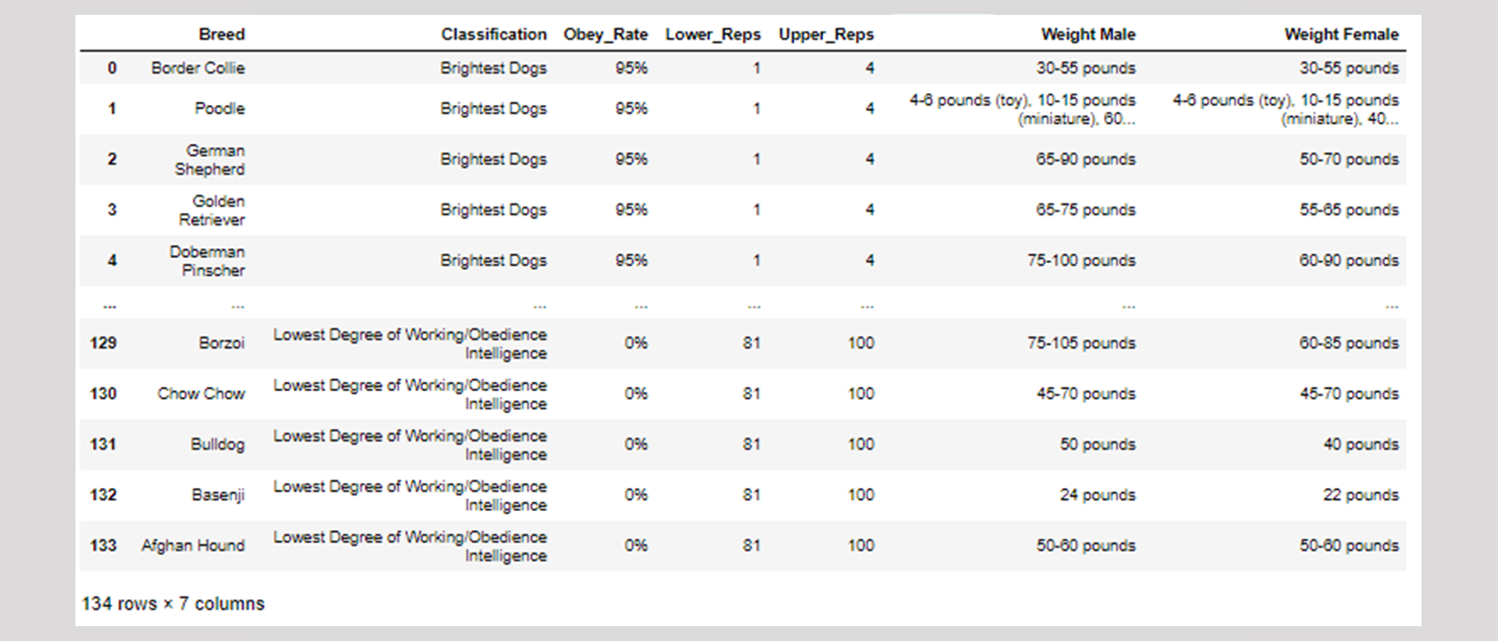

You should have a DataFrame that contains 134 rows and 7 columns.

In [2]:
# Step 2a: Read your first CSV containing Intelligence x Size
In_Size = pd.read_csv('/Users/sm/Desktop/CourseMaterials/Mergedv0.1.csv')
In_Size

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female
0,Border Collie,Brightest Dogs,95%,1,4,30-55 pounds,30-55 pounds
1,Poodle,Brightest Dogs,95%,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40..."
2,German Shepherd,Brightest Dogs,95%,1,4,110-150 pounds,80-120 pounds
3,Golden Retriever,Brightest Dogs,95%,1,4,65-75 pounds,55-65 pounds
4,Doberman Pinscher,Brightest Dogs,95%,1,4,75-100 pounds,60-90 pounds
...,...,...,...,...,...,...,...
129,Borzoi,Lowest Degree of Working/Obedience Intelligence,0%,81,100,75-105 pounds,60-85 pounds
130,Chow Chow,Lowest Degree of Working/Obedience Intelligence,0%,81,100,45-70 pounds,45-70 pounds
131,Bulldog,Lowest Degree of Working/Obedience Intelligence,0%,81,100,50 pounds,40 pounds
132,Basenji,Lowest Degree of Working/Obedience Intelligence,0%,81,100,24 pounds,22 pounds


In [3]:
# Step 2b: Read your Popularity CSV
Pop = pd.read_csv('/Users/sm/Desktop/CourseMaterials/breedpopularity.csv')
Pop.rename(columns=str.lower, inplace=True)
Pop

,breed,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank
0,Labrador Retrievers,1,1.0,1.0,1.0,1.0
1,German Shepherd Dogs,2,2.0,2.0,2.0,2.0
2,Golden Retrievers,3,3.0,3.0,3.0,3.0
3,French Bulldogs,4,4.0,6.0,6.0,9.0
4,Bulldogs,5,5.0,4.0,4.0,4.0
...,...,...,...,...,...,...
187,English Foxhounds,188,189.0,187.0,184.0,183.0
188,Harriers,189,183.0,186.0,193.0,181.0
189,Chinooks,190,179.0,175.0,177.0,171.0
190,Norwegian Lundehunds,191,190.0,188.0,182.0,184.0


### Step 3: Try merging the first DataFrame and the raw untransformed Popularity DataFrame
Before you do anything else, try merging these two DataFrames, and see what happens! 

In [4]:
# Step 3: Merge Intelligence x Size with Popularity
M = pd.merge(In_Size, Pop, how='inner', on='breed')
M

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank
0,Belgian Malinois,Excellent Working Dogs,85%,5,15,60-80 pounds,40-60 pounds,43,44.0,47.0,51.0,60.0
1,Finnish Spitz,Average Working/Obedience Intelligence,50%,26,40,25-33 pounds,20-28 pounds,184,177.0,179.0,178.0,174.0
2,Havanese,Average Working/Obedience Intelligence,50%,26,40,7-13 pounds,7-13 pounds,24,23.0,23.0,24.0,25.0
3,Shiba Inu,Average Working/Obedience Intelligence,50%,26,40,23 pounds,17 pounds,44,45.0,44.0,45.0,47.0
4,Maltese,Fair Working/Obedience Intelligence,30%,41,80,under 7 pounds,under 7 pounds,37,33.0,33.0,31.0,29.0
5,Chinese Crested,Fair Working/Obedience Intelligence,30%,41,80,8-12 pounds,8-12 pounds,79,79.0,77.0,75.0,65.0
6,Japanese Chin,Fair Working/Obedience Intelligence,30%,41,80,7-11 pounds,7-11 pounds,104,108.0,108.0,97.0,93.0
7,Great Pyrenees,Fair Working/Obedience Intelligence,30%,41,80,100 pounds & up,85 pounds & up,66,66.0,67.0,67.0,75.0
8,Shih Tzu,Lowest Degree of Working/Obedience Intelligence,0%,81,100,9-16 pounds,9-16 pounds,20,20.0,20.0,19.0,17.0
9,Pekingese,Lowest Degree of Working/Obedience Intelligence,0%,81,100,up to 14 pounds,up to 14 pounds,92,88.0,93.0,80.0,82.0


### Step 4: Repeat Part II Step 9 to fix Pattern 2
The Popularity DataFrame suffers from Pattern 2 and 3, and you can repeat what you did with the Size DataFrame from the previous Part.

More specifically, on Popularity you can repeat the following steps:
1. [Part II, Step 9] Remove the s from the breeds 
2. [Part II, Step 11] Correct the remaining breed names manually

In [5]:
# Step 4a: Fix Pattern 2 in Popularity by removing the string "s" from the breed names

import re
L1 = []

for i in Pop.breed:
    pattern1 = 's$'
    if bool(re.search(pattern1, i)):
        L1.append(i[:-1].strip())
    else:
        L1.append(i.strip())
        
Pop2 = Pop.copy()
Pop2['breed'] = L1

In [6]:
# Step 4b: Find the differences between the Breed in Intelligence x Size, and the Breed in Popularity

set(In_Size['breed']) - set(Pop2['breed'])

{'Australian Silky Terrier',
 'Belgian Malinois',
 'Belgian Shepherd Dog (Tervuren)',
 'Bouvier des Flandres',
 'Chinese Shar Pei',
 'Curly Coated Retriever',
 'Fox Terrier (Smooth)',
 'German Shepherd',
 'Great Pyrenees',
 'Griffon Bruxellois',
 'Jack Russell terrier',
 'Keeshond',
 'Kuvasz',
 'Pharaoh Hound',
 'Puli',
 'Saint Bernard',
 'Siberian Husky',
 'Soft-coated Wheaten Terrier'}

In [13]:
# Step 4c: Correct the values in Breed manually using replace
Pop3 = Pop2.replace('Silky Terrier','Australian Silky Terrier').replace('Belgian Malinoi','Belgian Malinois').replace('Belgian Tervuren','Belgian Shepherd Dog (Tervuren)').replace('Bouviers des Flandre','Bouvier des Flandres').replace('Chinese Shar-Pei','Chinese Shar Pei').replace('Curly-Coated Retriever','Curly Coated Retriever').replace('Smooth Fox Terrier','Fox Terrier (Smooth)').replace('German Shepherd Dog','German Shepherd').replace('Great Pyrenee','Great Pyrenees').replace('Brussels Griffon','Griffon Bruxellois').replace('Russell Terrier','Jack Russell terrier').replace('Keeshonden','Keeshond').replace('Kuvaszok','Kuvasz').replace('Pharoah Hound','Pharaoh Hound').replace('Pulik','Puli').replace('St. Bernard','Saint Bernard').replace('Siberian Huskie','Siberian Husky').replace('Soft Coated Wheaten Terrier','Soft-coated Wheaten Terrier')

### Step 5: Merge Intelligence x Size with Popularity
After you fix Popularity the same way you did with Size, you can merge the two DataFrames. 

If you performed the cleaning step successfully, the resulting DataFrame should combined properly which leaves you with a DataFrame containing:
1. 134 rows
2. 12 columns

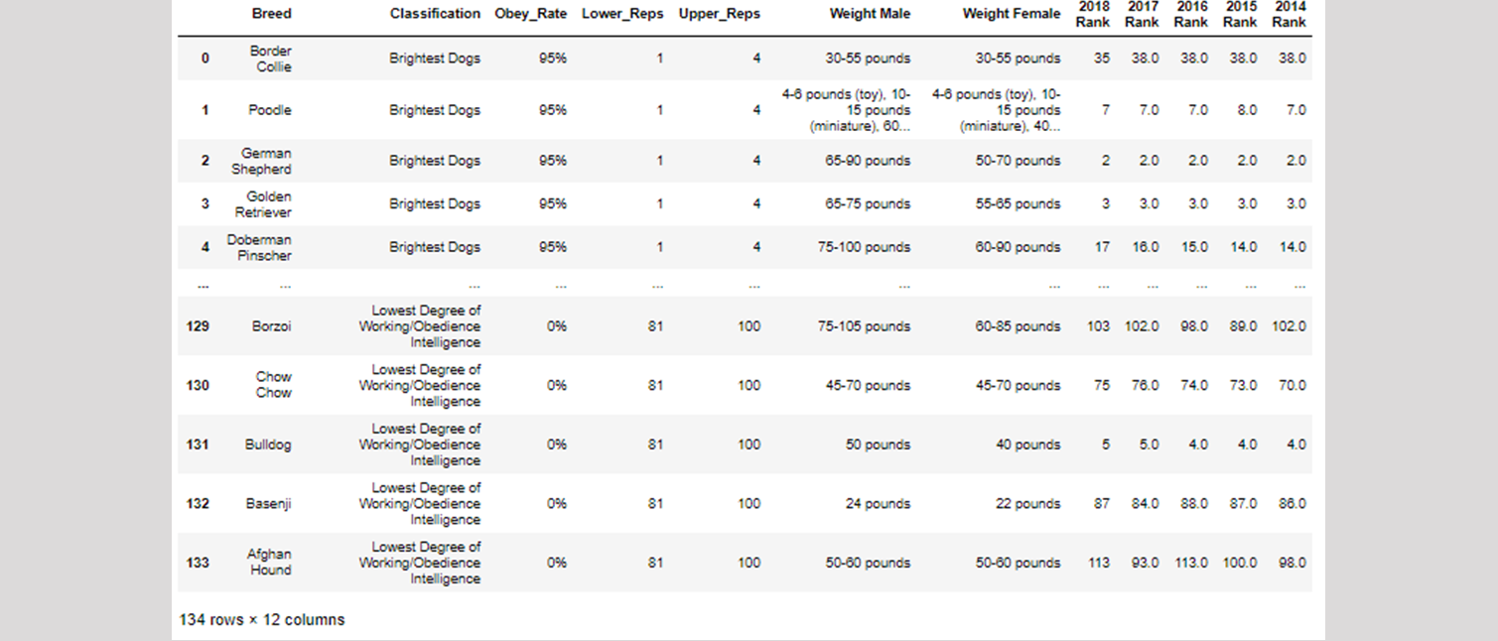

In [14]:
# Step 5: Merged the cleaned Popularity with Intelligence x Size
M1 = pd.merge(In_Size, Pop3, how='inner', on='breed')
M1

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank
0,Border Collie,Brightest Dogs,95%,1,4,30-55 pounds,30-55 pounds,35,38.0,38.0,38.0,38.0
1,Poodle,Brightest Dogs,95%,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40...",7,7.0,7.0,8.0,7.0
2,German Shepherd,Brightest Dogs,95%,1,4,110-150 pounds,80-120 pounds,2,2.0,2.0,2.0,2.0
3,Golden Retriever,Brightest Dogs,95%,1,4,65-75 pounds,55-65 pounds,3,3.0,3.0,3.0,3.0
4,Doberman Pinscher,Brightest Dogs,95%,1,4,75-100 pounds,60-90 pounds,17,16.0,15.0,14.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
129,Borzoi,Lowest Degree of Working/Obedience Intelligence,0%,81,100,75-105 pounds,60-85 pounds,103,102.0,98.0,89.0,102.0
130,Chow Chow,Lowest Degree of Working/Obedience Intelligence,0%,81,100,45-70 pounds,45-70 pounds,75,76.0,74.0,73.0,70.0
131,Bulldog,Lowest Degree of Working/Obedience Intelligence,0%,81,100,50 pounds,40 pounds,5,5.0,4.0,4.0,4.0
132,Basenji,Lowest Degree of Working/Obedience Intelligence,0%,81,100,24 pounds,22 pounds,87,84.0,88.0,87.0,86.0


In [12]:
M1.to_csv('Merged v0.2.csv', index=None)

## Clean the Weight Male/Female columns
### Step 6: Extract integers from Weight Male and create new column
Next up, we have to extract the numbers from Weight Male/Female columns. It seems daunting because it is almost free text and there does not seem to be a lot of exploitable patterns.

We will first create a new column named "Male Range". Each value is a list of numbers extracted from Weight Male.

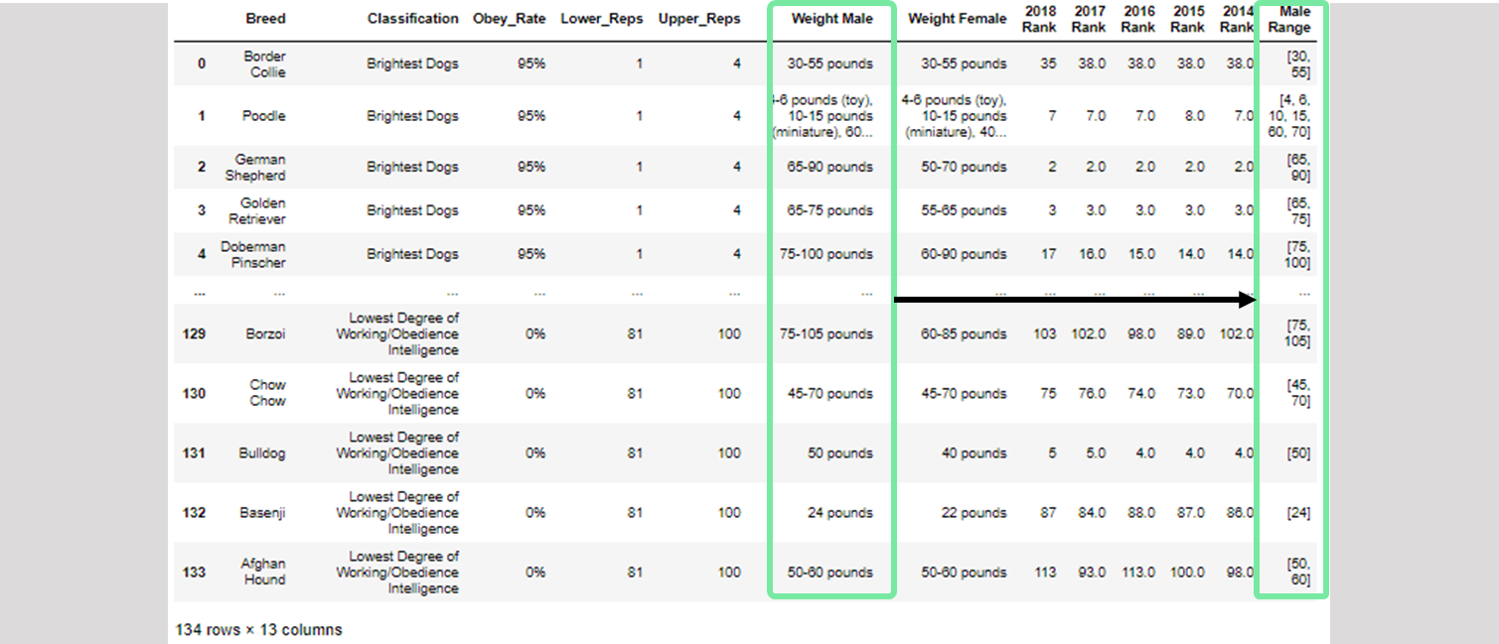

It's not so bad - the hints will be of immense help. 

<strong>Hint 1: Google "extract multiple values from string in pandas df"</strong>

<strong>Hint 2: You have to <font color = 'red'>find all</font> numbers in the string</strong>

In [21]:
# Step 6: Create a new column named "Male Range" by extracting the information from "Weight Male"
M1['male range'] = M1['weight male'].str.findall('\d+')
M1

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,male range
0,Border Collie,Brightest Dogs,95%,1,4,30-55 pounds,30-55 pounds,35,38.0,38.0,38.0,38.0,"[30, 55]"
1,Poodle,Brightest Dogs,95%,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40...",7,7.0,7.0,8.0,7.0,"[4, 6, 10, 15, 60, 70]"
2,German Shepherd,Brightest Dogs,95%,1,4,110-150 pounds,80-120 pounds,2,2.0,2.0,2.0,2.0,"[110, 150]"
3,Golden Retriever,Brightest Dogs,95%,1,4,65-75 pounds,55-65 pounds,3,3.0,3.0,3.0,3.0,"[65, 75]"
4,Doberman Pinscher,Brightest Dogs,95%,1,4,75-100 pounds,60-90 pounds,17,16.0,15.0,14.0,14.0,"[75, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Borzoi,Lowest Degree of Working/Obedience Intelligence,0%,81,100,75-105 pounds,60-85 pounds,103,102.0,98.0,89.0,102.0,"[75, 105]"
130,Chow Chow,Lowest Degree of Working/Obedience Intelligence,0%,81,100,45-70 pounds,45-70 pounds,75,76.0,74.0,73.0,70.0,"[45, 70]"
131,Bulldog,Lowest Degree of Working/Obedience Intelligence,0%,81,100,50 pounds,40 pounds,5,5.0,4.0,4.0,4.0,[50]
132,Basenji,Lowest Degree of Working/Obedience Intelligence,0%,81,100,24 pounds,22 pounds,87,84.0,88.0,87.0,86.0,[24]


### Step 7: Create a column named "Male Average"
After extracting the numerical data from Male Range, let's create a new column named "Male Average".

"Male Average" is the average of the weight range found in "Weight Male". 

Make a new list first. After that you will have to loop through the "Weight Male" column, and taking the average of the first two numbers to append into the new list. If there is only one number, take that number alone. 

The new list then becomes "Male Average". 

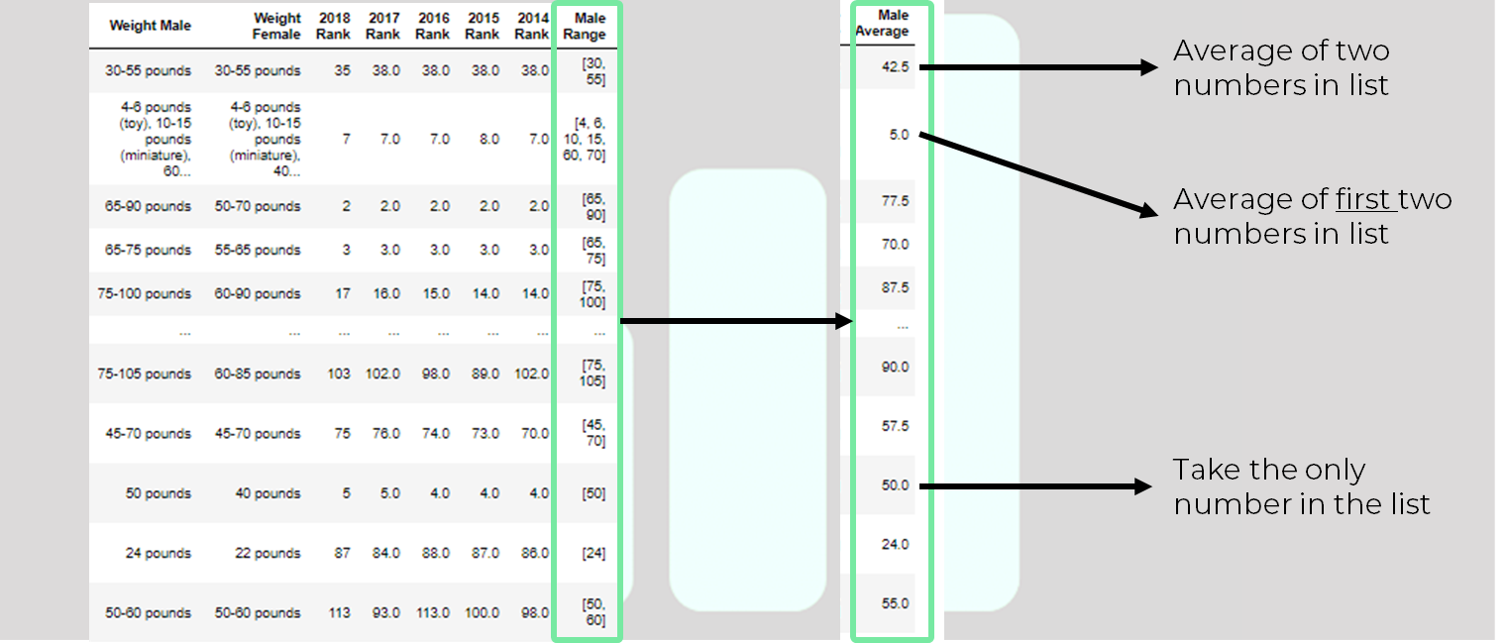

<strong>Hint: If you encounter an error, that's because the items in the list in Male Range are still strings. Turn them into floats!</strong>

<strong>Hint 2: Google "turn all items in list to float"</strong>

In [81]:
# Step 7: Create your Male Average column
import numpy as np
from statistics import mean
M1['male average'] = list(map(lambda x: mean([float(w) for w in x[:2]]) if len(x)>0 else np.nan, M1['male range']))
M1

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,male range,male average,female range
0,Border Collie,Brightest Dogs,95%,1,4,30-55 pounds,30-55 pounds,35,38.0,38.0,38.0,38.0,"[30, 55]",42.5,"[30, 55]"
1,Poodle,Brightest Dogs,95%,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40...",7,7.0,7.0,8.0,7.0,"[4, 6, 10, 15, 60, 70]",5.0,"[4, 6, 10, 15, 40, 50]"
2,German Shepherd,Brightest Dogs,95%,1,4,110-150 pounds,80-120 pounds,2,2.0,2.0,2.0,2.0,"[110, 150]",130.0,"[80, 120]"
3,Golden Retriever,Brightest Dogs,95%,1,4,65-75 pounds,55-65 pounds,3,3.0,3.0,3.0,3.0,"[65, 75]",70.0,"[55, 65]"
4,Doberman Pinscher,Brightest Dogs,95%,1,4,75-100 pounds,60-90 pounds,17,16.0,15.0,14.0,14.0,"[75, 100]",87.5,"[60, 90]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Borzoi,Lowest Degree of Working/Obedience Intelligence,0%,81,100,75-105 pounds,60-85 pounds,103,102.0,98.0,89.0,102.0,"[75, 105]",90.0,"[60, 85]"
130,Chow Chow,Lowest Degree of Working/Obedience Intelligence,0%,81,100,45-70 pounds,45-70 pounds,75,76.0,74.0,73.0,70.0,"[45, 70]",57.5,"[45, 70]"
131,Bulldog,Lowest Degree of Working/Obedience Intelligence,0%,81,100,50 pounds,40 pounds,5,5.0,4.0,4.0,4.0,[50],50.0,[40]
132,Basenji,Lowest Degree of Working/Obedience Intelligence,0%,81,100,24 pounds,22 pounds,87,84.0,88.0,87.0,86.0,[24],24.0,[22]


### Step 8: Repeat Step 6 and Step 7 for Weight Female
Now that you've done the "Male Range" and "Male Average" using values from Weight Male, time to do the same from "Weight Female" to get "Female Range" and "Female Average". 

When creating "Female Average", bear in mind that you might encounter empty lists. 

If the list is empty, append None for now. We will investigate rows that contain empty lists in subsequent Steps.

In [65]:
# Step 8a: Repeat Step 6 on Weight Female
M1['female range'] = M1['weight female'].str.findall('\d+')
M1

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,male range,male average,female range
0,Border Collie,Brightest Dogs,95%,1,4,30-55 pounds,30-55 pounds,35,38.0,38.0,38.0,38.0,"[30, 55]",42.5,"[30, 55]"
1,Poodle,Brightest Dogs,95%,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40...",7,7.0,7.0,8.0,7.0,"[4, 6, 10, 15, 60, 70]",5.0,"[4, 6, 10, 15, 40, 50]"
2,German Shepherd,Brightest Dogs,95%,1,4,110-150 pounds,80-120 pounds,2,2.0,2.0,2.0,2.0,"[110, 150]",130.0,"[80, 120]"
3,Golden Retriever,Brightest Dogs,95%,1,4,65-75 pounds,55-65 pounds,3,3.0,3.0,3.0,3.0,"[65, 75]",70.0,"[55, 65]"
4,Doberman Pinscher,Brightest Dogs,95%,1,4,75-100 pounds,60-90 pounds,17,16.0,15.0,14.0,14.0,"[75, 100]",87.5,"[60, 90]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Borzoi,Lowest Degree of Working/Obedience Intelligence,0%,81,100,75-105 pounds,60-85 pounds,103,102.0,98.0,89.0,102.0,"[75, 105]",90.0,"[60, 85]"
130,Chow Chow,Lowest Degree of Working/Obedience Intelligence,0%,81,100,45-70 pounds,45-70 pounds,75,76.0,74.0,73.0,70.0,"[45, 70]",57.5,"[45, 70]"
131,Bulldog,Lowest Degree of Working/Obedience Intelligence,0%,81,100,50 pounds,40 pounds,5,5.0,4.0,4.0,4.0,[50],50.0,[40]
132,Basenji,Lowest Degree of Working/Obedience Intelligence,0%,81,100,24 pounds,22 pounds,87,84.0,88.0,87.0,86.0,[24],24.0,[22]


In [82]:
# Step 8b: Repeat Step 7 on Female Range
M1['female average'] = list(map(lambda x: mean([float(w) for w in x[:2]]) if len(x)>0 else np.nan, M1['female range']))
M1

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,male range,male average,female range,female average
0,Border Collie,Brightest Dogs,95%,1,4,30-55 pounds,30-55 pounds,35,38.0,38.0,38.0,38.0,"[30, 55]",42.5,"[30, 55]",42.5
1,Poodle,Brightest Dogs,95%,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40...",7,7.0,7.0,8.0,7.0,"[4, 6, 10, 15, 60, 70]",5.0,"[4, 6, 10, 15, 40, 50]",5.0
2,German Shepherd,Brightest Dogs,95%,1,4,110-150 pounds,80-120 pounds,2,2.0,2.0,2.0,2.0,"[110, 150]",130.0,"[80, 120]",100.0
3,Golden Retriever,Brightest Dogs,95%,1,4,65-75 pounds,55-65 pounds,3,3.0,3.0,3.0,3.0,"[65, 75]",70.0,"[55, 65]",60.0
4,Doberman Pinscher,Brightest Dogs,95%,1,4,75-100 pounds,60-90 pounds,17,16.0,15.0,14.0,14.0,"[75, 100]",87.5,"[60, 90]",75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Borzoi,Lowest Degree of Working/Obedience Intelligence,0%,81,100,75-105 pounds,60-85 pounds,103,102.0,98.0,89.0,102.0,"[75, 105]",90.0,"[60, 85]",72.5
130,Chow Chow,Lowest Degree of Working/Obedience Intelligence,0%,81,100,45-70 pounds,45-70 pounds,75,76.0,74.0,73.0,70.0,"[45, 70]",57.5,"[45, 70]",57.5
131,Bulldog,Lowest Degree of Working/Obedience Intelligence,0%,81,100,50 pounds,40 pounds,5,5.0,4.0,4.0,4.0,[50],50.0,[40],40.0
132,Basenji,Lowest Degree of Working/Obedience Intelligence,0%,81,100,24 pounds,22 pounds,87,84.0,88.0,87.0,86.0,[24],24.0,[22],22.0


### Step 9: Check the number of nulls in each column
Check now many missing data you have in the columns.

In [84]:
# Step 9: Find the number of missing data in each column in your DataFrame
M1.isnull().sum(axis=0) 

breed             0
classification    0
obey_rate         0
lower_reps        0
upper_reps        0
weight male       0
weight female     0
2018 rank         0
2017 rank         0
2016 rank         0
2015 rank         0
2014 rank         0
male range        0
male average      0
female range      0
female average    8
dtype: int64

### Step 10: Inspect rows with no averages in Female Average
Let's isolate rows that contain NaN in Female Average. Let's take a look why we're getting an empty list in our Female Range. You should see something like this:

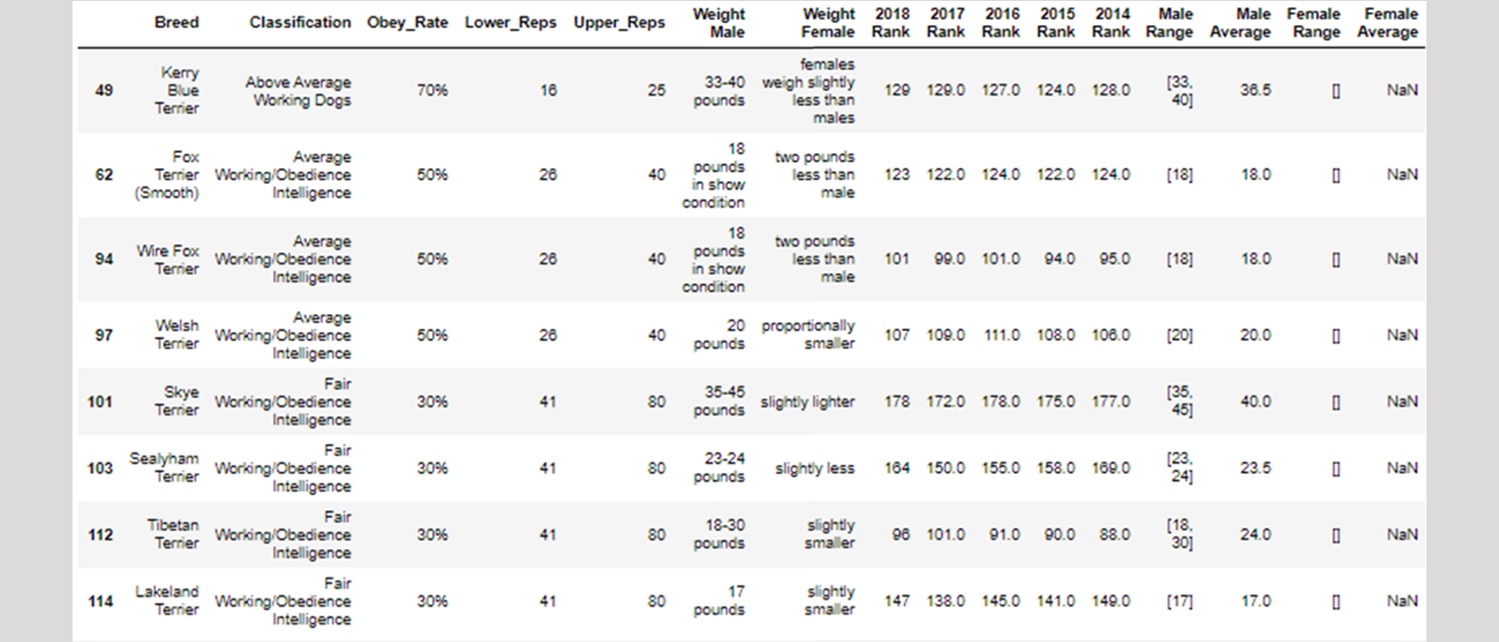

<strong>Hint: Google "pandas select rows with nan in a particular column"</strong>

In [85]:
# Step 10: Inspect rows with NaN in Female Average
M1[M1['female average'].isna()]

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,male range,male average,female range,female average
49,Kerry Blue Terrier,Above Average Working Dogs,70%,16,25,33-40 pounds,females weigh slightly less than males,129,129.0,127.0,124.0,128.0,"[33, 40]",36.5,[],NaN
62,Fox Terrier (Smooth),Average Working/Obedience Intelligence,50%,26,40,18 pounds in show condition,two pounds less than male,123,122.0,124.0,122.0,124.0,[18],18.0,[],NaN
94,Wire Fox Terrier,Average Working/Obedience Intelligence,50%,26,40,18 pounds in show condition,two pounds less than male,101,99.0,101.0,94.0,95.0,[18],18.0,[],NaN
97,Welsh Terrier,Average Working/Obedience Intelligence,50%,26,40,20 pounds,proportionally smaller,107,109.0,111.0,108.0,106.0,[20],20.0,[],NaN
101,Skye Terrier,Fair Working/Obedience Intelligence,30%,41,80,35-45 pounds,slightly lighter,178,172.0,178.0,175.0,177.0,"[35, 45]",40.0,[],NaN
103,Sealyham Terrier,Fair Working/Obedience Intelligence,30%,41,80,23-24 pounds,slightly less,164,150.0,155.0,158.0,169.0,"[23, 24]",23.5,[],NaN
112,Tibetan Terrier,Fair Working/Obedience Intelligence,30%,41,80,18-30 pounds,slightly smaller,96,101.0,91.0,90.0,88.0,"[18, 30]",24.0,[],NaN
114,Lakeland Terrier,Fair Working/Obedience Intelligence,30%,41,80,17 pounds,slightly smaller,147,138.0,145.0,141.0,149.0,[17],17.0,[],NaN


### Step 11: Replace NaN in Female Average with Male Average in the same row
Notice that that NaN happen because there wasn't any numbers/ranges to extract? If you read the values, it seems like the difference between the males and females in that breed is small.

As such, we can just replace the NaN in Female Average with the Male Average in the same row.

<strong>Hint: Google "how to pass another entire column as argument to pandas fillna()"</strong>

In [91]:
# Step 11: Replace the NaN Female Average with Male Average in the same row
M1['female average'].fillna(M1['male average'],inplace=True)
M1

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,male range,male average,female range,female average
0,Border Collie,Brightest Dogs,95%,1,4,30-55 pounds,30-55 pounds,35,38.0,38.0,38.0,38.0,"[30, 55]",42.5,"[30, 55]",42.5
1,Poodle,Brightest Dogs,95%,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40...",7,7.0,7.0,8.0,7.0,"[4, 6, 10, 15, 60, 70]",5.0,"[4, 6, 10, 15, 40, 50]",5.0
2,German Shepherd,Brightest Dogs,95%,1,4,110-150 pounds,80-120 pounds,2,2.0,2.0,2.0,2.0,"[110, 150]",130.0,"[80, 120]",100.0
3,Golden Retriever,Brightest Dogs,95%,1,4,65-75 pounds,55-65 pounds,3,3.0,3.0,3.0,3.0,"[65, 75]",70.0,"[55, 65]",60.0
4,Doberman Pinscher,Brightest Dogs,95%,1,4,75-100 pounds,60-90 pounds,17,16.0,15.0,14.0,14.0,"[75, 100]",87.5,"[60, 90]",75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Borzoi,Lowest Degree of Working/Obedience Intelligence,0%,81,100,75-105 pounds,60-85 pounds,103,102.0,98.0,89.0,102.0,"[75, 105]",90.0,"[60, 85]",72.5
130,Chow Chow,Lowest Degree of Working/Obedience Intelligence,0%,81,100,45-70 pounds,45-70 pounds,75,76.0,74.0,73.0,70.0,"[45, 70]",57.5,"[45, 70]",57.5
131,Bulldog,Lowest Degree of Working/Obedience Intelligence,0%,81,100,50 pounds,40 pounds,5,5.0,4.0,4.0,4.0,[50],50.0,[40],40.0
132,Basenji,Lowest Degree of Working/Obedience Intelligence,0%,81,100,24 pounds,22 pounds,87,84.0,88.0,87.0,86.0,[24],24.0,[22],22.0


In [92]:
M1.isnull().sum(axis=0) 

breed             0
classification    0
obey_rate         0
lower_reps        0
upper_reps        0
weight male       0
weight female     0
2018 rank         0
2017 rank         0
2016 rank         0
2015 rank         0
2014 rank         0
male range        0
male average      0
female range      0
female average    0
dtype: int64

### Step 12: Export the final merged DataFrame as a CSV
Well done! You're finally done combining the three different CSVs as a single combined DataFrame.

Export this Intelligence x Size x Popularity DataFrame as a CSV for use in Part IV.

In [94]:
# Step 12: Export the DataFrame as a CSV
M1.to_csv('Merged v0.3.csv', index=None)

### End of Part III
What a journey - you've successfully combined three different CSVs together, using clever text cleaning and pattern exploitation. 

In your data analytics/science journey, expect many more of such puzzle solving as you work with data from different sources. 

In the next Part, you will analyze the fruits of your labor and investigate relationships between the different columns.